# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', None) 

In [4]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

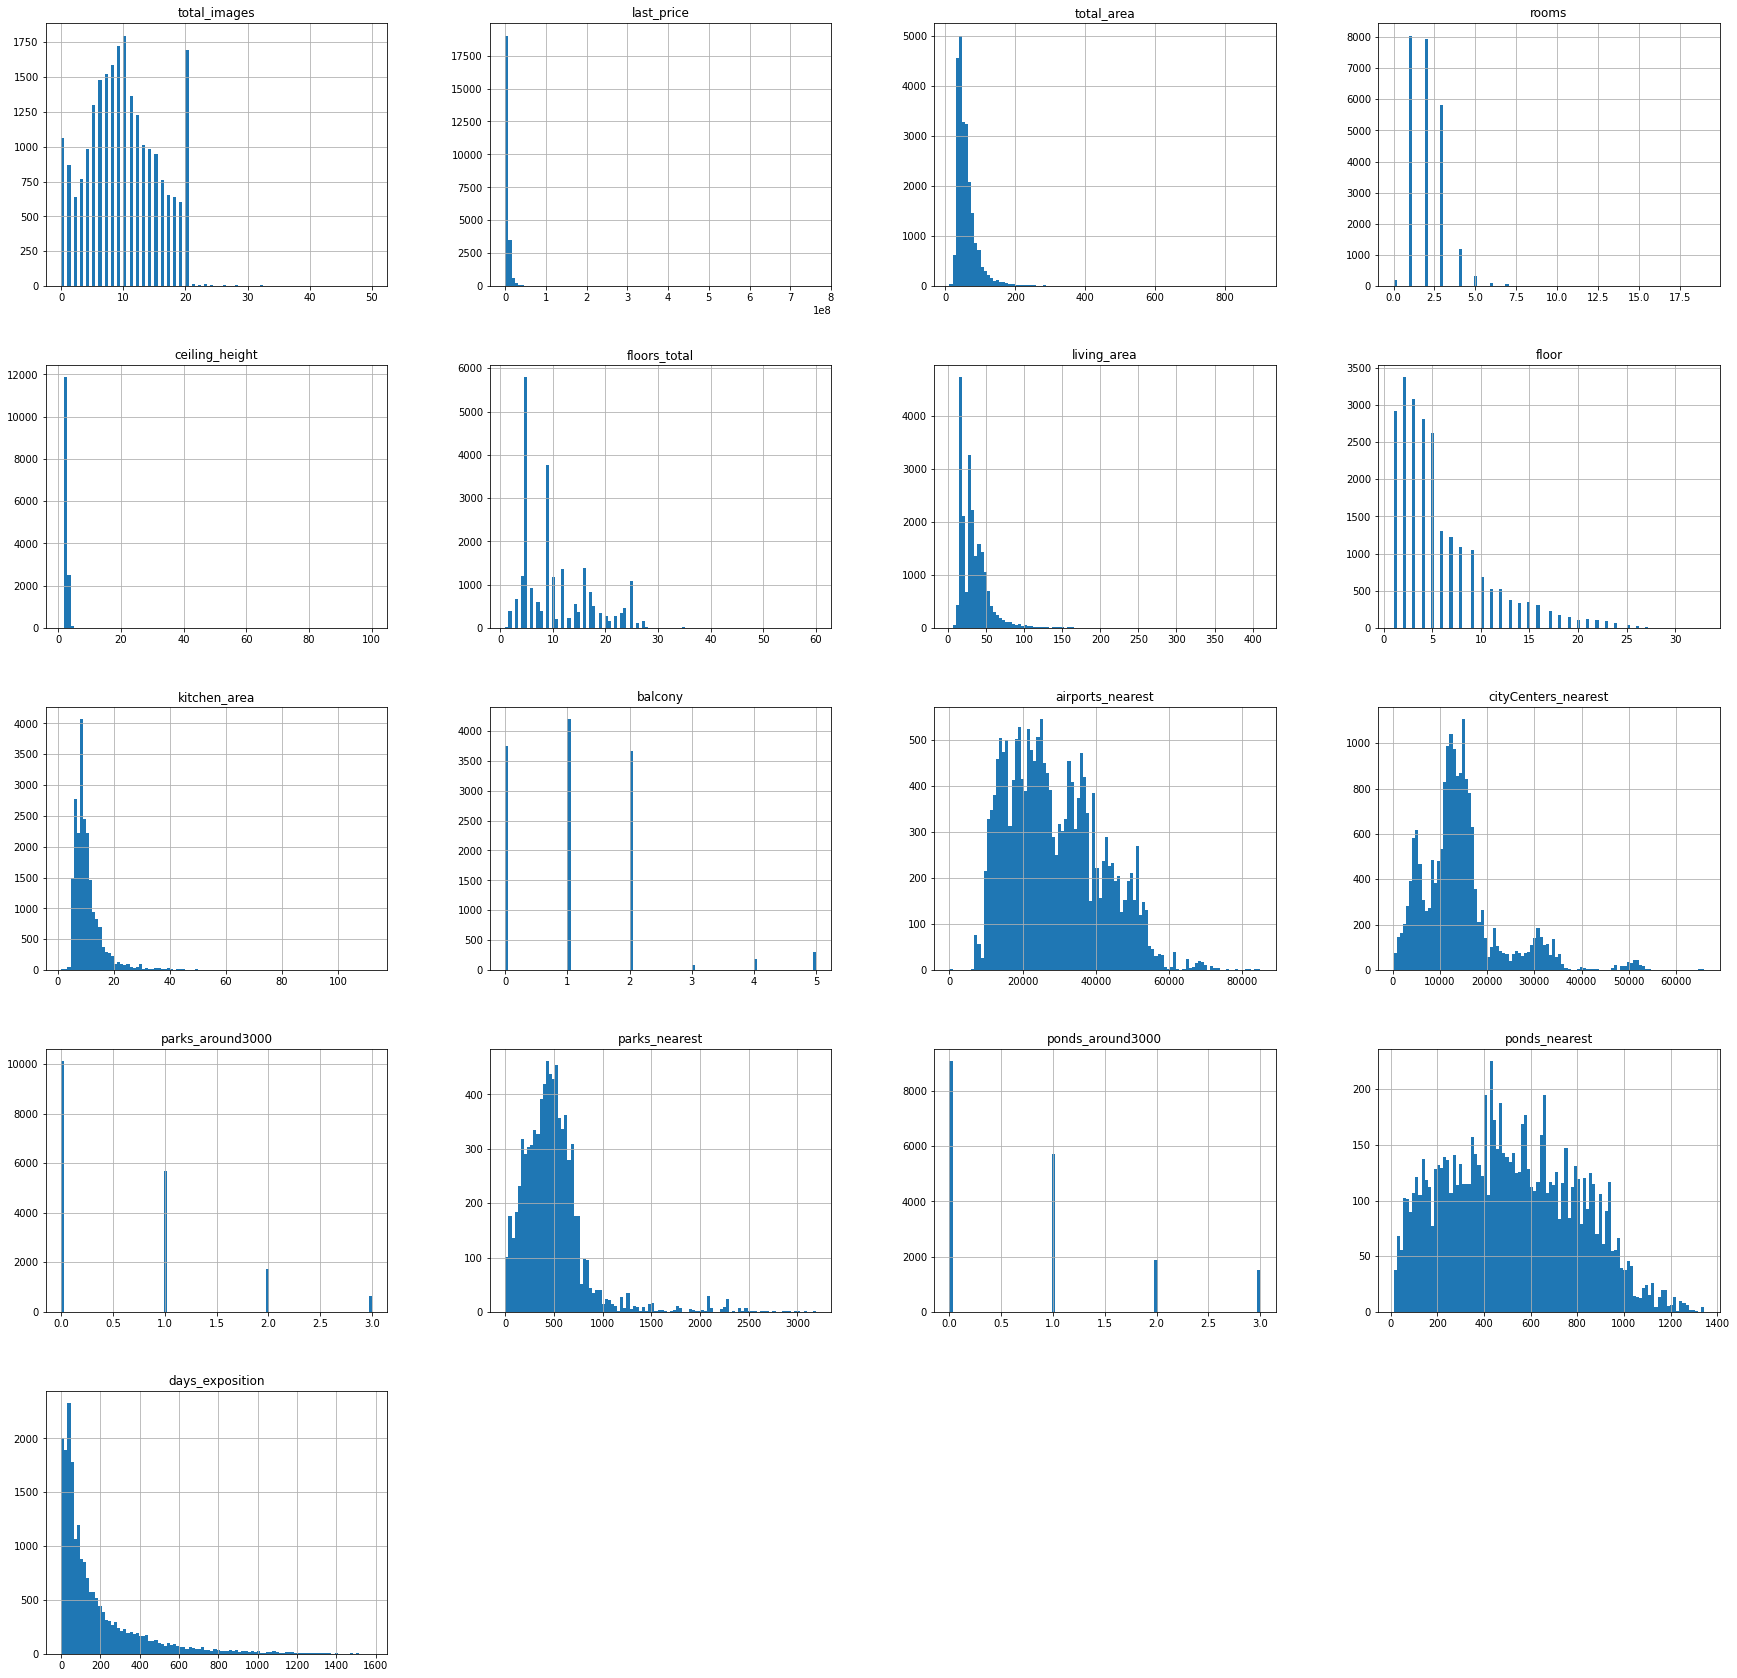

In [6]:
data.hist(bins=100, figsize=(30, 30));

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


Вывод:
Датасет содержит 23699 записей и 22 столбца. В нескольких столбцах присутствуют пропущенные значения, такие как высота потолков (`ceiling_height`), общее количество этажей (`floors_total`), жилая площадь (`living_area`) и другие. Большинство столбцов представлены числовыми данными (типы `int64` и `float64`), некоторые имеют объектный тип данных (например, дата первого размещения объявления (`first_day_exposition`), информация о типе квартиры (`is_apartment`), название населенного пункта (`locality_name`)). Также в датасете есть столбцы с булевыми значениями (тип `bool`), которые указывают на наличие студии (`studio`) или открытого плана (`open_plan`). Есть информация о времени публикации объявлений, датах последнего просмотра (`days_exposition`), а также годах публикации и экспозиции. Географические данные включают расстояние от центра (`dist_from_center_km`), наличие парков и водоемов в радиусе 3 км, аэропорта и другие. Дополнительные характеристики недвижимости включают высоту потолков, наличие балкона, тип планировки (студия, открытый план) и другие параметры.

### Предобработка данных

In [8]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [9]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by='space', ascending=True)
            .plot(kind='barh', figsize=(19, 6), legend=False, fontsize=16, color='SteelBlue')
        );
        plt.title('Пропущенные значения, %' + "\n", fontsize=22, color='Black')
        plt.xlabel('Процент пропусков', fontsize=22)
        plt.ylabel('Столбцы с пропусками', fontsize=22)
        plt.xlim(0, 100)  # Установка шкалы от 0 до 100
    except:
        print('Пропусков не осталось :) или произошла ошибка в первой части функции ')


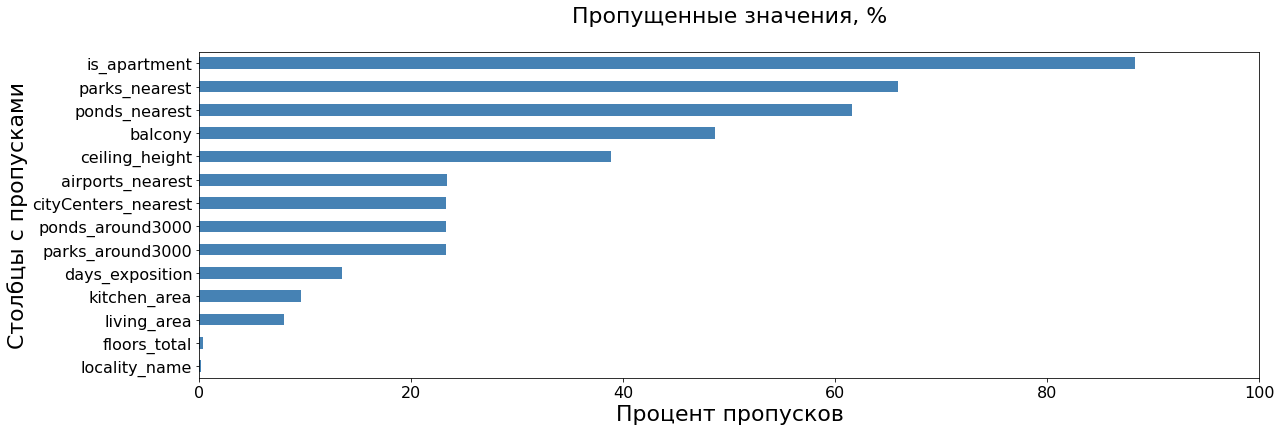

In [10]:
pass_value_barh(data)

#### **[Заполнение пропущенных значений]**

В ходе анализа данных выявлено, что в столбце `ceiling_height` отсутствует около 38% значений. Для корректного заполнения этих пропусков принято решение заменить их медианными значениями для каждого населенного пункта. Этот подход будет использован также и для других аналогичных столбцов: `kitchen_area` и `living_area`.

После заполнения синтетическими данными столбцов, выявлены аномалии в данных и произведена их коррекция для столбца total_area в соответствии с условием [total_area * 0.9 <= living_area + kitchen_area].

В отношении столбца `locality_name` отсутствующие названия населенных пунктов будут заменены значением "Неизвестно".

Для столбцов, связанных с количеством балконов, парков и прудов, пропущенные значения будут заменены на нули.

In [11]:
data_grouped = data.groupby('locality_name')
for name, group in data_grouped:
    group['ceiling_height'].fillna(group['ceiling_height'].median(), inplace=True)
    group['living_area'].fillna(group['living_area'].median(), inplace=True)
    group['kitchen_area'].fillna(group['kitchen_area'].median(), inplace=True)

In [12]:
anomalies = data.query("total_area * 0.9 <= living_area + kitchen_area")
anomalies

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
41,16,7900000.0,74.0,2016-05-04T00:00:00,3,NaN,14.0,59.0,8,False,False,False,12.0,5.0,Санкт-Петербург,37715.0,12612.0,1.0,725.0,1.0,759.0,179.0
171,6,3800000.0,49.0,2019-02-22T00:00:00,2,2.50,9.0,38.0,8,NaN,False,False,10.0,1.0,посёлок Шушары,18471.0,24272.0,0.0,NaN,0.0,NaN,11.0
184,7,2600000.0,30.2,2018-02-14T00:00:00,1,2.65,9.0,26.1,5,NaN,False,False,6.2,NaN,Санкт-Петербург,13952.0,15031.0,0.0,NaN,1.0,824.0,12.0
220,8,3890000.0,37.0,2018-07-09T00:00:00,1,2.50,25.0,28.0,6,NaN,False,False,9.0,NaN,Санкт-Петербург,25408.0,16166.0,0.0,NaN,0.0,NaN,28.0
319,19,4850000.0,59.7,2015-03-19T00:00:00,3,2.50,5.0,47.4,4,NaN,False,False,6.4,1.0,Санкт-Петербург,43095.0,15599.0,0.0,NaN,0.0,NaN,974.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23216,15,10150000.0,114.0,2015-01-21T00:00:00,4,NaN,5.0,90.2,4,NaN,False,False,16.0,NaN,Санкт-Петербург,26259.0,4961.0,0.0,NaN,2.0,838.0,1052.0
23297,10,1850000.0,48.2,2019-03-13T00:00:00,2,NaN,5.0,42.2,2,NaN,False,False,6.0,1.0,Высоцк,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23328,12,4299000.0,54.0,2016-11-25T00:00:00,2,NaN,14.0,40.0,8,NaN,False,False,10.0,0.0,Колпино,25612.0,31399.0,0.0,NaN,0.0,NaN,343.0
23521,13,8500000.0,65.0,2018-11-01T00:00:00,2,NaN,4.0,44.0,2,NaN,False,False,15.3,NaN,Санкт-Петербург,22276.0,3996.0,1.0,627.0,0.0,NaN,NaN


In [13]:
anomaly_condition = data['total_area'] * 0.9 <= data['living_area'] + data['kitchen_area']
data.loc[anomaly_condition, 'total_area'] = np.nan

In [14]:
data['locality_name'] = data['locality_name'].fillna('Неизвестно')

In [15]:
data['balcony'] = data['balcony'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0) 

In [16]:
# check
data.shape

(23699, 22)

#### **[Изменение типов данных]**

Столбец `first_day_exposition` был преобразован в тип данных `datetime64[ns]` для более удобной работы с датами.

Столбец `floors_total` был преобразован в тип данных `Int64` с использованием строгой типизации, что позволяет корректно обрабатывать пропущенные значения и работать с целочисленными данными.

Столбец `balcony` был преобразован в тип данных `int`.

Столбец `rooms` был округлен до целых значений и преобразован в тип данных `int`.

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23224 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

In [18]:
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S'
)

In [19]:
data['floors_total'] = data['floors_total'].astype('Int64') #(?)
data['balcony'] = data['balcony'].astype(int)
data['rooms'] = data['rooms'].round(0).astype(int)

In [20]:
# check
data["is_apartment"].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

#### **[Устранение неявных дубликатов и аномальных значений]**

Произведена предобработка данных в столбце `locality_name` для устранения неявных дубликатов и нормализации значений. Все наименования населенных пунктов были приведены к нижнему регистру, и произведены замены для унификации записей (например, замена 'поселок' на 'посёлок'). Эти шаги позволяют сделать данные более однородными, облегчая последующий анализ и предотвращая возможные несоответствия из-за различий в написании или регистре.

In [21]:
data['locality_name'] = data['locality_name'].str.lower()

In [22]:
data['locality_name'] = (
    data['locality_name']
    .replace('поселок городского типа', 'посёлок городского типа', regex=True)
    .replace('поселок', 'посёлок', regex=True)
    .replace('городской поселок', 'городской посёлок', regex=True)
    .replace(['посёлок городского типа мга', 'городской посёлок мга'],'городской посёлок мга', regex=True)
    .replace(['посёлок городского типа павлово', 'городской посёлок павлово'],'городской посёлок павлово', regex=True)
    .replace('любань', 'посёлок любань',regex=True)
)
unique_localities_sorted = sorted(data['locality_name'].unique())
#unique_localities_sorted

In [23]:
# check
data.locality_name.nunique()

329

In [25]:
key_columns = ['total_area', 'floor', 'floors_total', 'cityCenters_nearest', 'locality_name', 'rooms']
duplicates = data.duplicated(subset=key_columns, keep=False)
duplicate_entries = data[duplicates]
print("Количество найденных дубликатов:", len(duplicate_entries))
duplicate_entries

Количество найденных дубликатов: 402


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
187,9,4300000.0,52.3,2017-10-06,2,NaN,12,29.80,4,NaN,False,False,10.90,0,санкт-петербург,32794.0,13643.0,0.0,NaN,0.0,NaN,69.0
197,5,1600000.0,46.0,2016-04-22,2,NaN,5,NaN,2,False,False,False,NaN,1,сясьстрой,NaN,NaN,0.0,NaN,0.0,NaN,171.0
279,19,18450000.0,134.0,2019-03-18,4,NaN,18,78.00,17,NaN,False,False,30.00,0,санкт-петербург,34991.0,11920.0,0.0,NaN,0.0,NaN,NaN
355,17,3600000.0,55.2,2018-07-12,2,25.00,5,32.00,2,False,False,False,NaN,2,гатчина,NaN,NaN,0.0,NaN,0.0,NaN,259.0
432,12,1490000.0,36.0,2018-09-10,1,2.50,5,17.10,3,NaN,False,False,8.40,2,волосово,NaN,NaN,0.0,NaN,0.0,NaN,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23516,3,22529250.0,139.5,2018-07-04,4,3.30,16,82.55,9,NaN,False,False,13.84,0,санкт-петербург,37434.0,8460.0,1.0,441.0,2.0,427.0,266.0
23541,16,5200000.0,63.0,2017-10-27,3,2.55,12,41.00,4,NaN,False,False,7.00,0,санкт-петербург,49631.0,14525.0,2.0,672.0,1.0,172.0,165.0
23548,14,2250000.0,36.0,2017-10-14,1,2.50,5,17.00,5,NaN,False,False,9.00,0,выборг,NaN,NaN,0.0,NaN,0.0,NaN,425.0
23643,1,660000.0,45.0,2019-02-19,2,NaN,5,31.00,4,False,False,False,6.00,1,сланцы,NaN,NaN,0.0,NaN,0.0,NaN,NaN


In [26]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max', 'median'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"23,699.00","23,224.00","14,504.00","20,518.00","23,699.00","21,796.00","21,421.00","23,699.00","23,613.00"
min,0.00,12.00,1.00,1.00,"12,190.00",2.00,1.30,1.00,1.00
max,19.00,900.00,100.00,"1,580.00","763,000,000.00",409.70,112.00,33.00,60.00
median,2.00,52.00,2.65,95.00,"4,650,000.00",30.00,9.10,4.00,9.00


In [27]:
# check

try:
    df_check = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
# если не получилось прочитать файл из локальной папки, то загружаем данные из сети
except:
    df_check = pd.read_csv('real_estate_data.csv', sep='\t')

In [28]:
# check
df_check.rooms.value_counts().to_frame()

,rooms
1,8047
2,7940
3,5814
4,1180
5,326
0,197
6,105
7,59
8,12
9,8


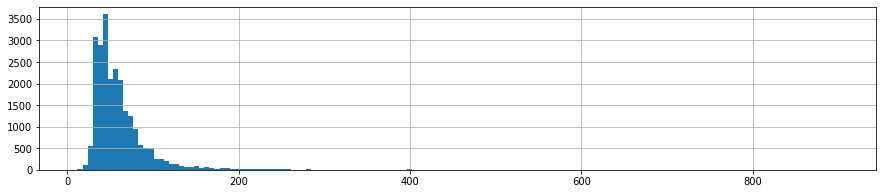

In [29]:
# check
df_check.total_area.hist(bins = 150, figsize = (15,3));

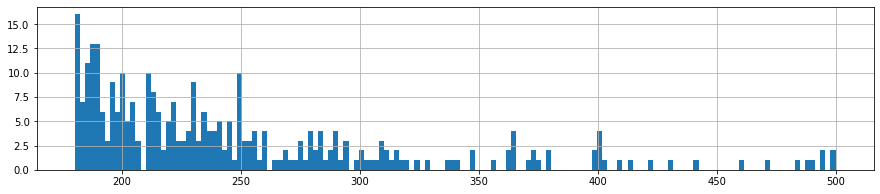

In [30]:
# check
df_check.total_area.hist(bins = 150, figsize = (15,3), range = (180,500));

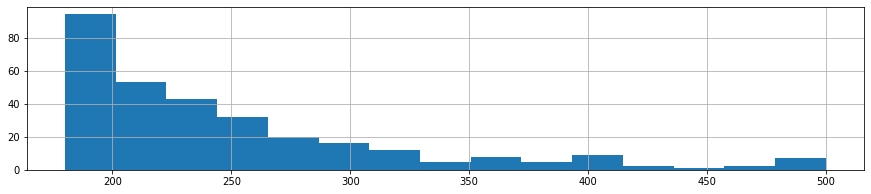

In [31]:
# check
df_check.total_area.hist(bins = 15, figsize = (15,3), range = (180,500));

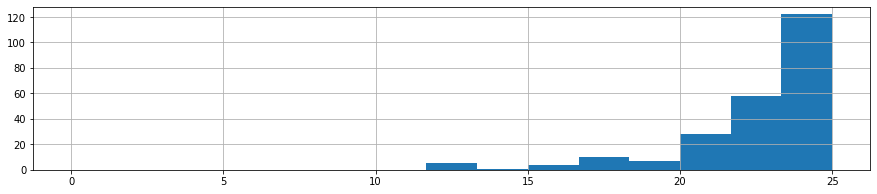

In [32]:
# check
df_check.total_area.hist(bins = 15, figsize = (15,3), range = (0,25));

In [33]:
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max', 'median'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"23,699.00","23,224.00","14,504.00","20,518.00","23,699.00","21,796.00","21,421.00","23,699.00","23,613.00"
min,0.00,12.00,1.00,1.00,"12,190.00",2.00,1.30,1.00,1.00
max,19.00,900.00,100.00,"1,580.00","763,000,000.00",409.70,112.00,33.00,60.00
median,2.00,52.00,2.65,95.00,"4,650,000.00",30.00,9.10,4.00,9.00


In [34]:
# check

# Значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.0012,0.00,20.00,2.30,3.00,"562,188.00",10.00,3.77,1.00,2.00
0.01,1.00,25.50,2.50,4.00,"1,000,000.00",13.00,5.00,1.00,2.00
0.5,2.00,52.00,2.65,95.00,"4,650,000.00",30.00,9.10,4.00,9.00
0.99,5.00,196.00,3.83,"1,068.66","36,000,000.00",120.00,35.09,23.00,26.00
0.9988,8.00,382.38,25.00,"1,369.90","124,772,448.00",219.69,60.00,26.00,35.00


<AxesSubplot:>

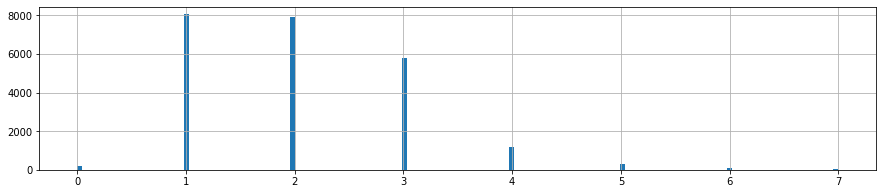

In [35]:
data = data.drop(data[(data['rooms'] > 7) | (data['rooms'] < 0)].index)
data.rooms.hist(bins=150, figsize=(15,3))

In [36]:
data.shape[0]

23668

<AxesSubplot:>

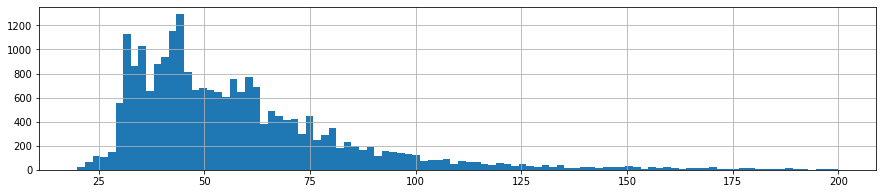

In [37]:
data = data.drop(data[(data['total_area'] > 200) | (data['total_area'] < 20)].index)
data.total_area.hist(bins=100, figsize=(15,3))

In [38]:
data.shape[0]

23453

#### check nan

##### check

In [39]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23453 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23453 non-null  int64         
 1   last_price            23453 non-null  float64       
 2   total_area            22978 non-null  float64       
 3   first_day_exposition  23453 non-null  datetime64[ns]
 4   rooms                 23453 non-null  int64         
 5   ceiling_height        14345 non-null  float64       
 6   floors_total          23368 non-null  Int64         
 7   living_area           21587 non-null  float64       
 8   floor                 23453 non-null  int64         
 9   is_apartment          2752 non-null   object        
 10  studio                23453 non-null  bool          
 11  open_plan             23453 non-null  bool          
 12  kitchen_area          21227 non-null  float64       
 13  balcony         

<AxesSubplot:>

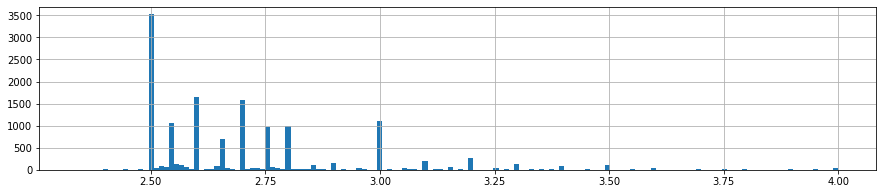

In [40]:
data.loc[data['ceiling_height'] > 10, 'ceiling_height'] = data['ceiling_height'] * 0.1
data = data.drop(data[(data['ceiling_height'] <= 2.3) | (data['ceiling_height'] > 4)].index) 
data['ceiling_height'].hist(bins=150, figsize=(15, 3))

In [41]:
# check
data.shape[0]

23390

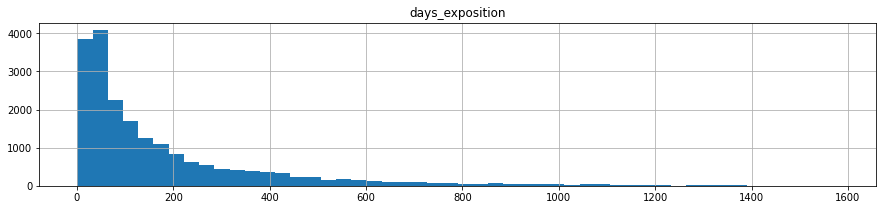

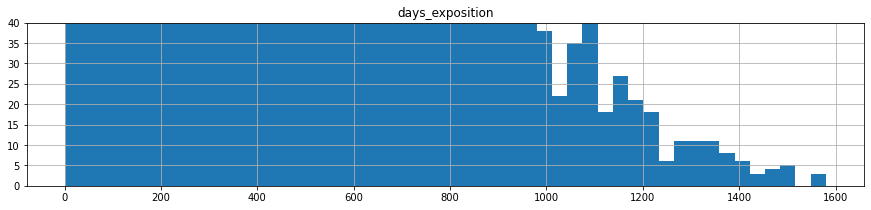

In [42]:
# check
data.hist(column = 'days_exposition', bins = 50, figsize = (15,3));
data.hist(column = 'days_exposition', bins = 50, figsize = (15,3))
plt.ylim(0, 40);

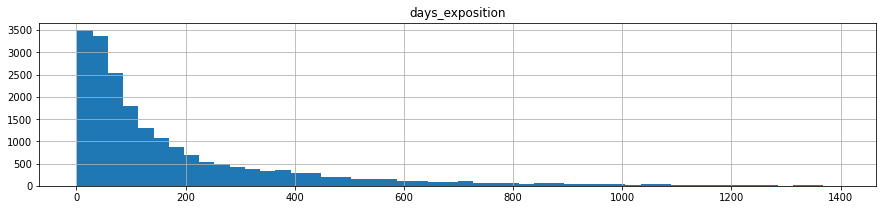

In [43]:
data = data.drop(data[(data['days_exposition'] < 2) | (data['days_exposition'] > 1400)].index) 
data.hist(column = 'days_exposition', bins = 50, figsize = (15,3));

In [44]:
data.shape[0]

23371

<AxesSubplot:>

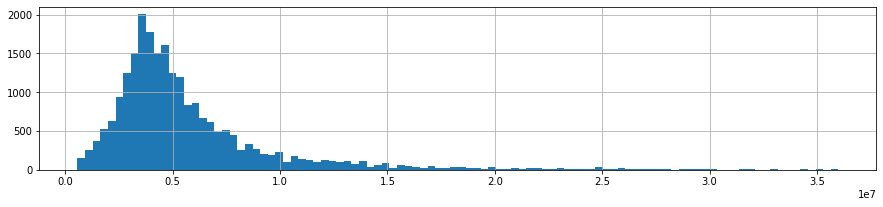

In [45]:
data = data.drop(data[(data['last_price'] < 562188.00) | (data['last_price'] > 36000000.00)].index) 
data.last_price.hist(bins=100, figsize=(15,3))

In [46]:
# check
data.shape[0]

23216

<AxesSubplot:>

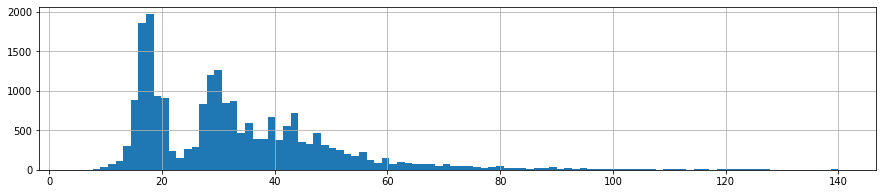

In [47]:
data = data.drop(data[(data['living_area'] < 5) | (data['living_area'] > 140)].index) 
data.living_area.hist(bins=100, figsize=(15,3))

In [48]:
data.shape[0]

23198

<AxesSubplot:>

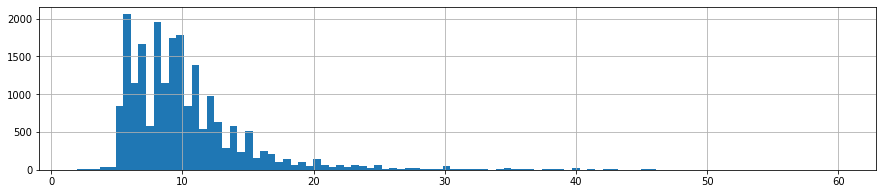

In [49]:
data = data.drop(data[(data['kitchen_area'] < 2) | (data['kitchen_area'] > 60)].index) 
data.kitchen_area.hist(bins=100, figsize=(15,3))

<AxesSubplot:>

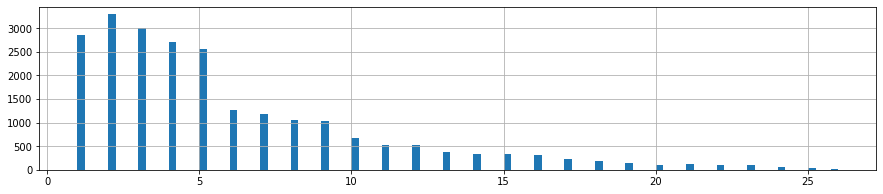

In [50]:
data = data.drop(data[(data['floor'] > 26)].index) 
data.floor.hist(bins=100, figsize=(15,3))

<AxesSubplot:>

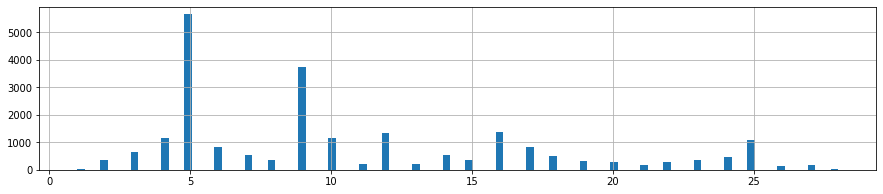

In [51]:
data.floors_total.describe()
data = data.drop(data[(data['floors_total'] > 28)].index) 
data.floors_total.hist(bins=100, figsize=(15,3))

In [52]:
data.shape[0]

23152

In [53]:
# check

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"23,152.00","22,706.00","14,149.00","20,081.00","23,152.00","21,316.00","20,961.00","23,152.00","23,067.00"
min,0.00,20.00,2.34,2.00,"565,000.00",5.00,2.00,1.00,1.00
max,7.00,200.00,4.00,"1,396.00","36,000,000.00",140.00,60.00,26.00,28.00


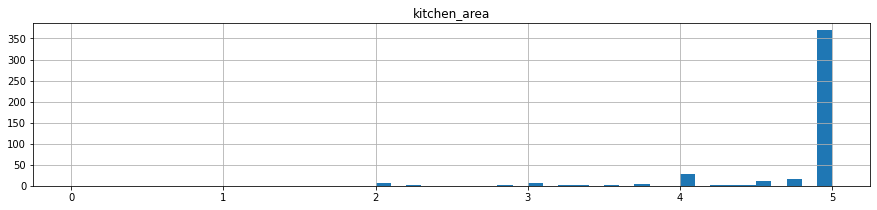

In [54]:
# check
data.hist(column = 'kitchen_area', bins = 50, figsize = (15,3), range = (0,5));

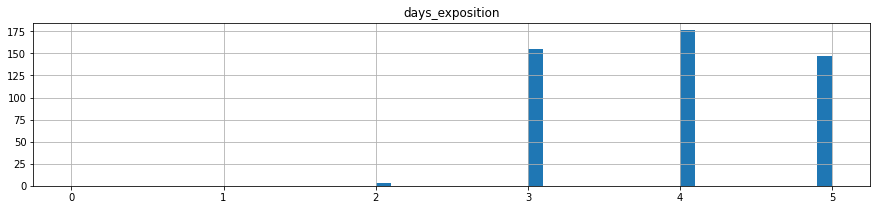

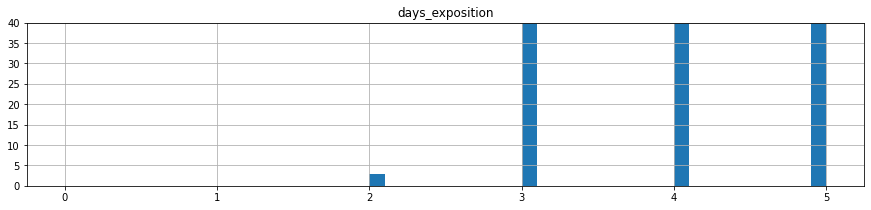

In [55]:
# check
data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5));

data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5))
plt.ylim(0, 40);

Вывод:

В процессе фильтрации данных были выявлены и обработаны аномалии в нескольких параметрах. В столбце `ceiling_height` были скорректированы значения, предполагаемо выраженные в сантиметрах, путем деления на 10. Далее были удалены записи с аномальными значениями в столбцах:
* количество комнат (`rooms`): исключены записи с количеством комнат менее 1 и более 7.  
* оёбщая площадь (`total_area`): убраны записи с общей площадью менее 20 кв.м и более 200 кв.м.
* высота потолков (`ceiling_height`): исключены записи с высотой потолков менее 2.3 м и более 4 м.  
* длительность экспозиции (`days_exposition`): исключены записи с временем размещения объявления менее 2 дней и более 1400 дней.
* цена (`last_price`): исключены записи с ценой менее 562,188.00 и более 36,000,000.00.
* жилая площадь (`living_area`): удалены записи с жилой площадью менее 5 кв.м и более 140 кв.м.
* площадь кухни (`kitchen_area`): исключены записи с площадью кухни менее 2 кв.м и более 60 кв.м.
* этаж (`floor`): убраны записи с этажом более 26.
* общее количество этажей в доме (`floors_total`): исключены записи с общим количеством этажей более 35.

Окончательный размер датасета составил 23160 с процентом потерь примерно 2.3%, что находится в пределах оптимального уровня (менее 5%). В процессе фильтрации использовались методы анализа данных, такие как гистограммы, оценка квантилей и статистика описательных показателей для выявления аномалий и выбросов.

### Посчитайте и добавьте в таблицу новые столбцы

In [56]:
def floor_categ(row):
    floor = row['floor']
    total_floor = row['floors_total']
    
    if pd.isnull(floor) or pd.isnull(total_floor):
        return 'неизвестно'
    elif floor <= 0 or floor > total_floor:
        return 'неизвестно'
    elif floor == 1:
        return 'первый'
    elif floor == total_floor:
        return 'последний'
    else:
        return 'другой'

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23152 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23152 non-null  int64         
 1   last_price            23152 non-null  float64       
 2   total_area            22706 non-null  float64       
 3   first_day_exposition  23152 non-null  datetime64[ns]
 4   rooms                 23152 non-null  int64         
 5   ceiling_height        14149 non-null  float64       
 6   floors_total          23067 non-null  Int64         
 7   living_area           21316 non-null  float64       
 8   floor                 23152 non-null  int64         
 9   is_apartment          2708 non-null   object        
 10  studio                23152 non-null  bool          
 11  open_plan             23152 non-null  bool          
 12  kitchen_area          20961 non-null  float64       
 13  balcony         

In [58]:
data['price_per_sq'] = data['last_price'] / data['total_area'] 
data['day_published'] = data['first_day_exposition'].dt.weekday
data['month_published'] = data['first_day_exposition'].dt.month
data['year_published'] = data['first_day_exposition'].dt.year

data['floor_type'] = data.apply(floor_categ, axis=1)

data['dist_from_center_km'] = data['cityCenters_nearest'] / 1000
data['dist_from_center_km'] = data['dist_from_center_km'].round()

data.sort_values(by='living_area', ascending=False).head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sq,day_published,month_published,year_published,floor_type,dist_from_center_km
12567,19,22000000.0,NaN,2015-03-25,5,2.8,7,140.0,2,NaN,False,False,30.0,0,санкт-петербург,24324.0,5038.0,0.0,NaN,0.0,NaN,NaN,NaN,2,3,2015,другой,5.0
12549,10,14500000.0,NaN,2017-02-02,6,NaN,6,140.0,4,NaN,False,False,19.0,0,санкт-петербург,20561.0,1827.0,3.0,427.0,3.0,251.0,180.0,NaN,3,2,2017,другой,2.0
13729,14,20300000.0,NaN,2017-11-26,3,3.4,6,140.0,4,NaN,False,False,25.0,1,санкт-петербург,26273.0,4975.0,3.0,388.0,1.0,189.0,104.0,NaN,6,11,2017,другой,5.0
3725,16,28000000.0,188.0,2015-06-09,5,3.4,6,139.0,5,NaN,False,False,NaN,0,санкт-петербург,25069.0,3771.0,1.0,135.0,1.0,618.0,1395.0,148936.170213,1,6,2015,другой,4.0
9889,1,12990000.0,191.0,2017-08-31,7,3.3,5,136.1,2,NaN,False,False,16.0,0,санкт-петербург,26856.0,5704.0,0.0,NaN,1.0,1017.0,77.0,68010.471204,3,8,2017,другой,6.0


Вывод:

В проведенном анализе были добавлены в таблицу следующие параметры: цена одного квадратного метра, день, месяц и год публикации объявления, тип этажа квартиры (первый, последний, другой), а также расстояние до центра города в километрах. Кроме того, был реализована функция floor_categ, которая определяет тип этажа на основе данных о текущем этаже и общем количестве этажей в доме.

In [59]:
data['dist_from_center_km'].head(2)

0    16.0
1    19.0
Name: dist_from_center_km, dtype: float64

### Проведите исследовательский анализ данных

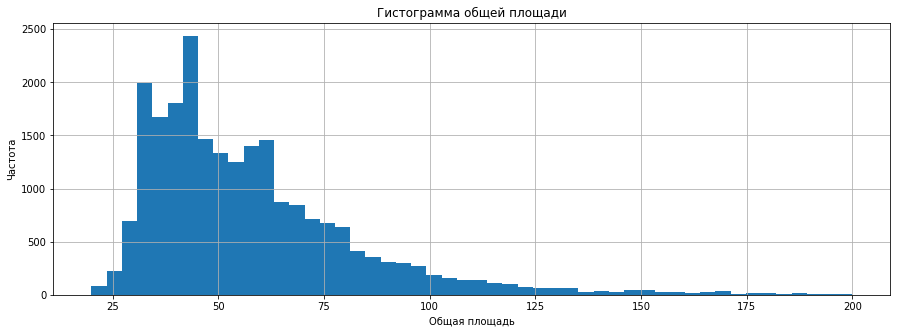

In [60]:
data['total_area'].hist(bins=50, figsize=(15,5))
plt.title('Гистограмма общей площади')
plt.xlabel('Общая площадь')
plt.ylabel('Частота')
plt.show()

Вывод: 
Гистограмма общей площади недвижимости показывает, что большинство объектов имеют относительно небольшую площадь, с пиком в районе 40-50 квадратных метров. Распределение имеет положительную асимметрию, где существует небольшое количество объектов с очень большой площадью (выбросов). Среднее значение площади примерно равно медиане, что указывает на отсутствие сильных смещений в данных.

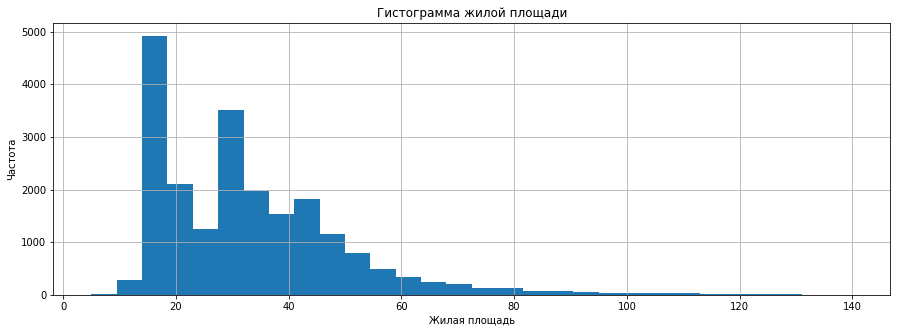

In [61]:
data['living_area'].hist(bins=30, figsize=(15,5))
plt.title('Гистограмма жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Частота')
plt.show()

Вывод: 
Гистограмма жилой площади демонстрирует, что большинство квартир имеют площадь от 16 до 45 квадратных метров, что соответствует медианному значению в 30 квадратных метров. Небольшое количество квартир обладает более высокой площадью, достигая максимальных значений до 140 квадратных метров.

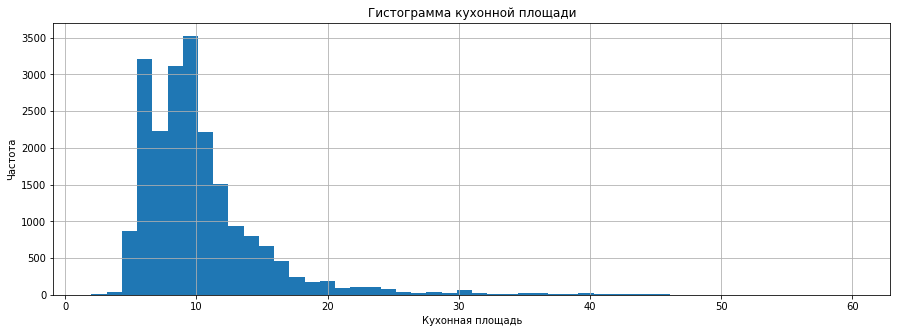

In [62]:
data['kitchen_area'].hist(bins=50, figsize=(15,5))
plt.title('Гистограмма кухонной площади')
plt.xlabel('Кухонная площадь')
plt.ylabel('Частота')
plt.show()

Вывод:
Большинство кухонных площадей сосредоточены в диапазоне от 7 до 12 квадратных метров, что подтверждается пиком в этой области. Среднее значение кухонной площади составляет около 10,3 квадратных метра. Наблюдаются отдельные случаи с кухнями более 20 квадратных метров, но они представляют собой выбросы и не характерны для общего распределения.

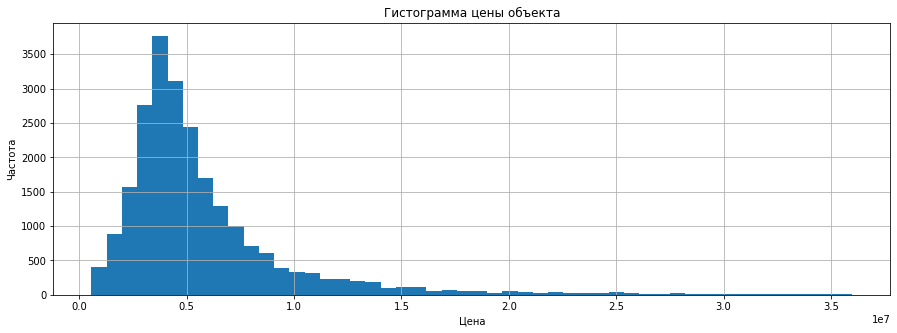

In [63]:
data['last_price'].hist(bins=50, figsize=(15,5))
plt.title('Гистограмма цены объекта')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.show()

Вывод:
Распределение цен на недвижимость является правосторонним с длинным хвостом в области высоких цен. Большинство объектов сосредоточены в диапазоне от 500 тысяч до 10 миллионов, при этом медианное значение цены составляет 4,6 миллиона. Отмечается наличие выбросов с высокими ценами, что указывает на наличие редких, но значительно более дорогих объектов. 

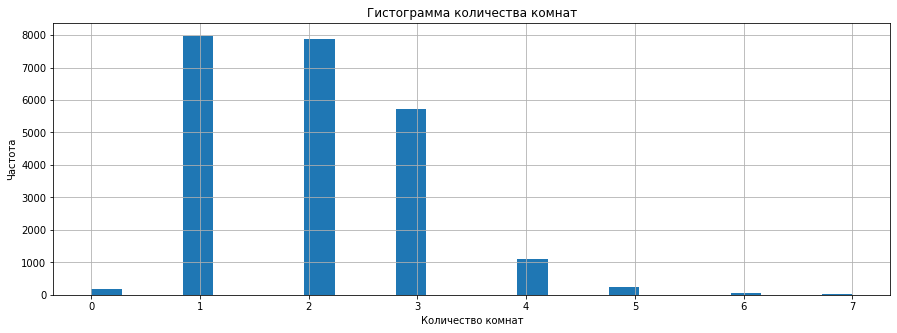

In [64]:
data['rooms'].hist(bins=25, figsize=(15,5))
plt.title('Гистограмма количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Частота')
plt.show()

Вывод:
По гистограмме видно, что большинство объектов имеют от одной до трех комнат, что согласуется с медианным значением в 2 комнаты. Обнаруживаются случаи с нулевым значением, что может свидетельствовать о том, что некоторые объявления могут содержать некорректные данные или студии без выделенных комнат.

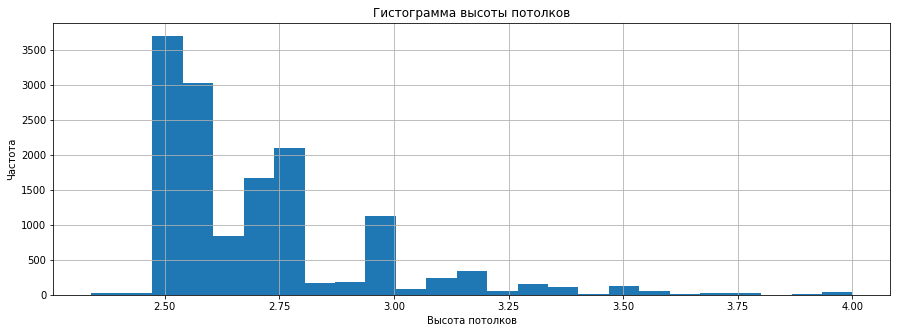

In [65]:
data['ceiling_height'].hist(bins=25, figsize=(15,5))
plt.title('Гистограмма высоты потолков')
plt.xlabel('Высота потолков')
plt.ylabel('Частота')
plt.show()

Вывод: 
Гистограмма высоты потолков в недвижимости представляет собой распределение, сосредоточенное вокруг значений от 2.3 до 4 метров. Большинство объектов имеют высоту потолков в диапазоне от 2.5 до 2.8 метров, что соответствует стандартным значениям для жилой недвижимости. Наблюдается небольшой процент объектов с высотой потолков выше 3 метров, что может указывать на наличие особенных типов помещений или архитектурных решений в датасете.

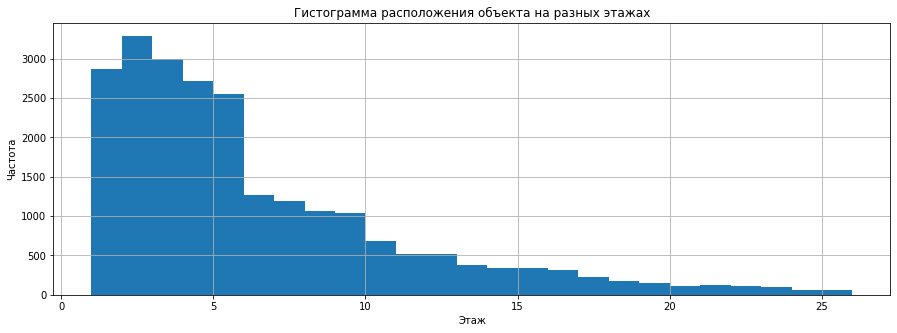

In [66]:
data['floor'].hist(bins=25, figsize=(15,5))
plt.title('Гистограмма расположения объекта на разных этажах')
plt.xlabel('Этаж')
plt.ylabel('Частота')
plt.show()

Вывод:
Большинство объектов находятся на нижних этажах, что подтверждается пиком в районе первого этажа. Отмечается умеренный спад частоты объектов на последующих этажах. Наиболее редкими являются объекты, расположенные выше в здании. Медианное значение этажа близко к 4, что указывает на относительно равномерное распределение.

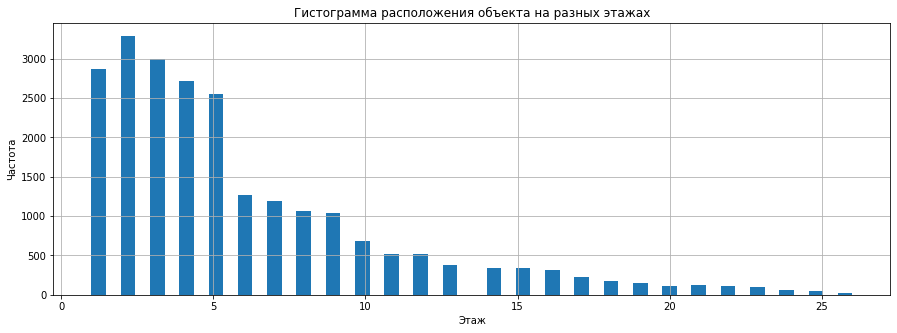

In [67]:
# пример

data['floor'].hist(bins=26*2, figsize=(15,5))
plt.title('Гистограмма расположения объекта на разных этажах')
plt.xlabel('Этаж')
plt.ylabel('Частота')
plt.show()

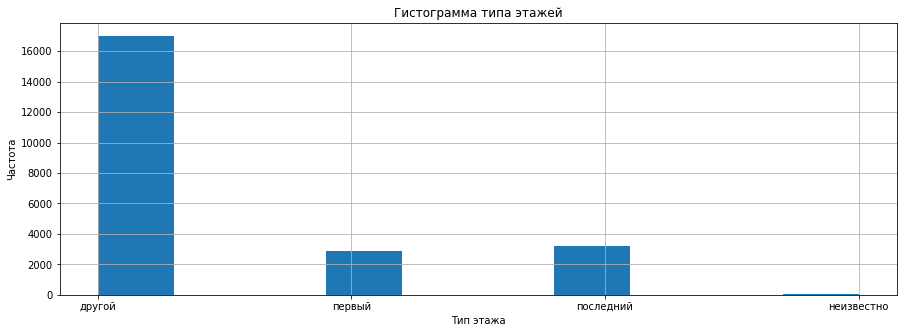

In [68]:
data['floor_type'].hist(bins=10, figsize=(15,5))
plt.title('Гистограмма типа этажей')
plt.xlabel('Тип этажа')
plt.ylabel('Частота')
plt.show()

Вывод:
Большинство квартир в датасете располагаются на промежуточных этажах, что отображается в значении "другой" в гистограмме. На втором месте по частоте находятся квартиры на последнем этаже, а затем на первом. 

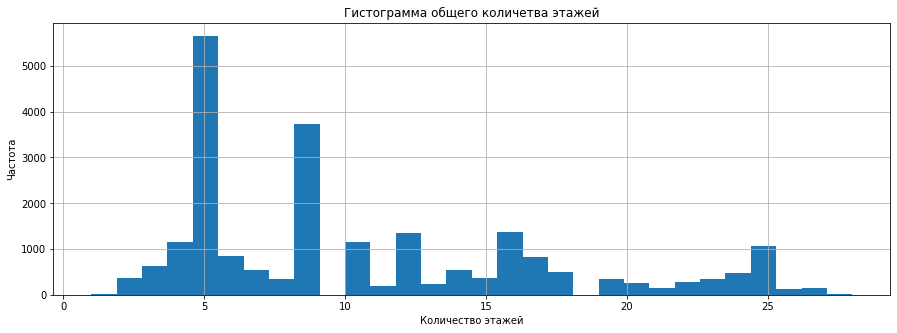

In [69]:
data['floors_total'].hist(bins=30, figsize=(15,5))
plt.title('Гистограмма общего количетва этажей')
plt.xlabel('Количество этажей')
plt.ylabel('Частота')
plt.show()

Вывод:
Гистограмма общего количества этажей недвижимости показывает, что большинство объектов имеют от 5 до 16 этажей, с наиболее частым значением в диапазоне от 5 до 9 этажей. Есть небольшое количество объектов с очень низким (1 этаж) и высоким (28 этажей) числом этажей, что может быть связано с особенностями рынка недвижимости.

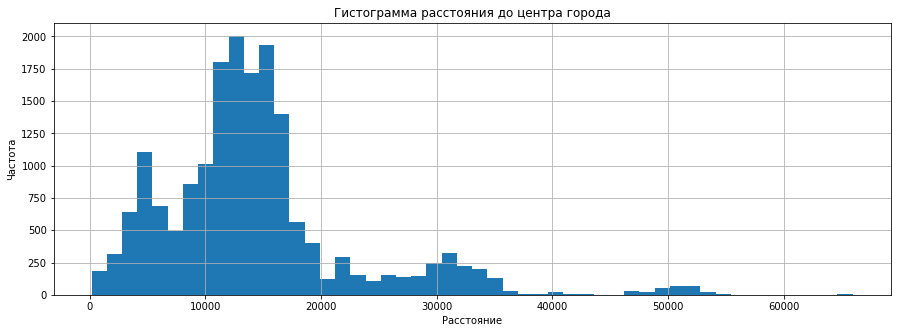

In [70]:
data['cityCenters_nearest'].hist(bins=50, figsize=(15,5))
plt.title('Гистограмма расстояния до центра города')
plt.xlabel('Расстояние')
plt.ylabel('Частота')
plt.show()

Вывод: 
По графику можно отметить, что большинство объектов недвижимости находятся в относительной близости к центру, с пиком частоты в интервале от 10  до 15 км. Среднее расстояние составляет приблизительно 14.3 км. Гистограмма имеет положительную асимметрию, что указывает на то, что есть относительно небольшое количество объектов, которые находятся на значительном расстоянии от центра, что подтверждается максимальным значением в районе 65 км.

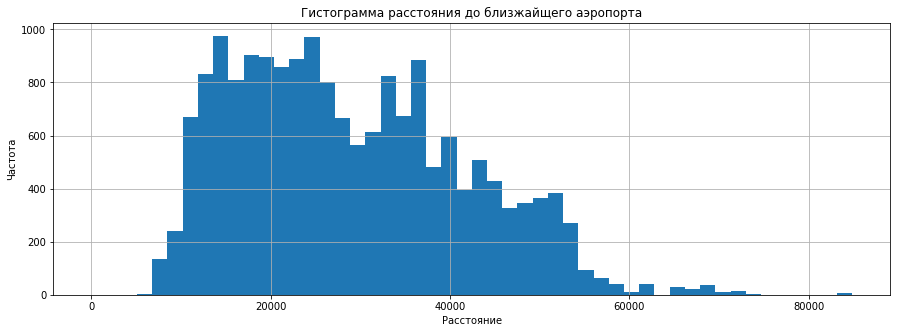

In [71]:
data['airports_nearest'].hist(bins=50, figsize=(15,5))
plt.title('Гистограмма расстояния до близжайщего аэропорта')
plt.xlabel('Расстояние')
plt.ylabel('Частота')
plt.show()

Вывод:
По графику видно, что большинство наблюдений сосредоточены в диапазоне от 15 до 40 км, с пиком в районе 20 - 30 км. Распределение имеет положительную скошенность, что указывает на то, что большинство наблюдений находятся ближе к минимальному значению. Общее среднее значение составляет около 28 км, при этом стандартное отклонение составляет примерно 12.7 км, что указывает на значительный разброс данных.

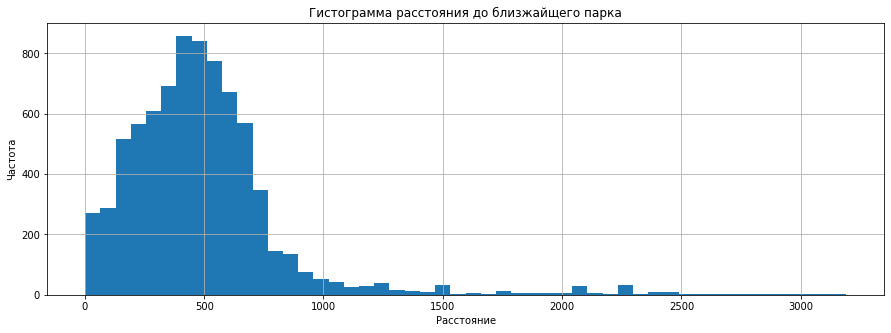

In [72]:
data['parks_nearest'].hist(bins=50, figsize=(15,5))
plt.title('Гистограмма расстояния до близжайщего парка')
plt.xlabel('Расстояние')
plt.ylabel('Частота')
plt.show()

Вывод:
Видно, что большинство объектов находится в пределах 200-600 метров от ближайшего парка. Среднее значение составляет примерно 493 метра, а максимальное расстояние достигает 3190 метров. Наблюдается пик значений около минимального значения, что указывает на наличие объектов с парками в непосредственной близости. С увеличением расстояния частота уменьшается, что типично для природных объектов в удалении от жилых зон.

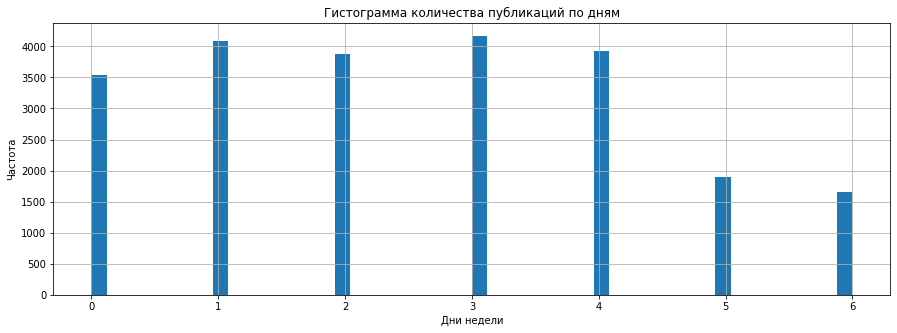

In [73]:
data['day_published'].hist(bins=50, figsize=(15,5))
plt.title('Гистограмма количества публикаций по дням')
plt.xlabel('Дни недели')
plt.ylabel('Частота')
plt.show()

Вывод:
Гистограмма показывает, что четверг (значение 3) является пиковым днем для размещения объявлений, а в конце недели наблюдается заметный спад активности. По этой визуализации можно сделать вывод, что пользователи предпочитают размещать объявления в середине недели, возможно, связывая это с повышенной активностью потенциальных покупателей.

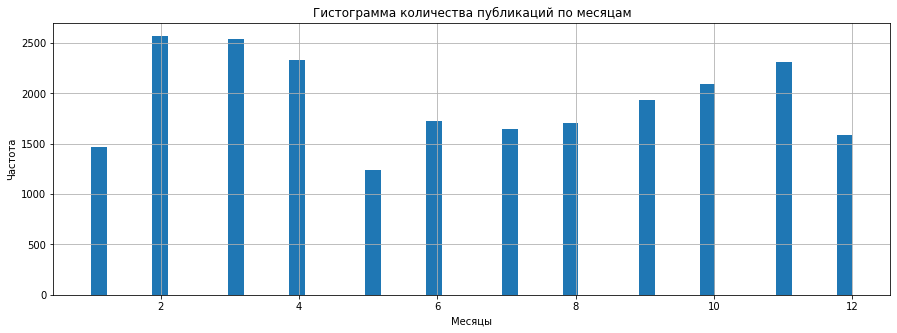

In [74]:
data['month_published'].hist(bins=50, figsize=(15,5))
plt.title('Гистограмма количества публикаций по месяцам')
plt.xlabel('Месяцы')
plt.ylabel('Частота')
plt.show()

Вывод:
Наблюдается некоторая вариация в распределении объявлений в течение года. Среднее значение месяца публикации составляет примерно 6.4, что указывает на равномерное распределение в течение года. Наибольшая активность наблюдается весной и осенью, что может быть связано с сезонными колебаниями в рынке недвижимости.

#### Анализ скорости продаж недвижимости 

In [75]:
data['days_exposition'].describe()

count    20081.000000
mean       178.156566
std        214.776083
min          2.000000
25%         45.000000
50%         95.000000
75%        228.000000
max       1396.000000
Name: days_exposition, dtype: float64

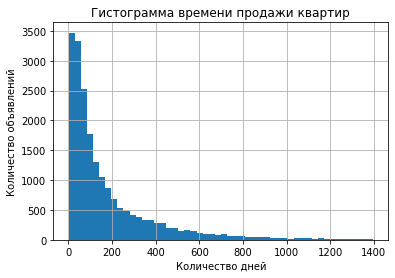

In [76]:
data['days_exposition'].hist(bins=50)
plt.title('Гистограмма времени продажи квартир')
plt.xlabel('Количество дней')
plt.ylabel('Количество объявлений')
plt.show()

In [77]:
mean_days = data['days_exposition'].mean()
median_days = data['days_exposition'].median()

print(f"Среднее время продажи: {mean_days:.2f} дней")
print(f"Медианное время продажи: {median_days} дней")

Среднее время продажи: 178.16 дней
Медианное время продажи: 95.0 дней


In [78]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])
data['year_exposition'] = data['first_day_exposition'].dt.year
mean_days_by_year = data.groupby('year_exposition')['days_exposition'].mean()

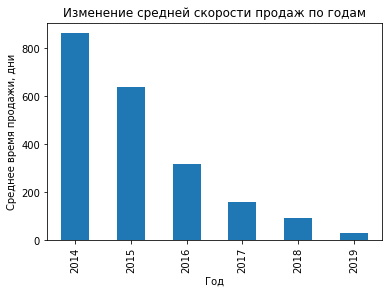

In [79]:
mean_days_by_year.plot(kind='bar', title='Изменение средней скорости продаж по годам')
plt.xlabel('Год')
plt.ylabel('Среднее время продажи, дни')
plt.show()

In [80]:
# Рассмотрим моду (пиковые значения) в 'days_exposition'
mode_days = data['days_exposition'].mode()
mode_days

0    45.0
dtype: float64

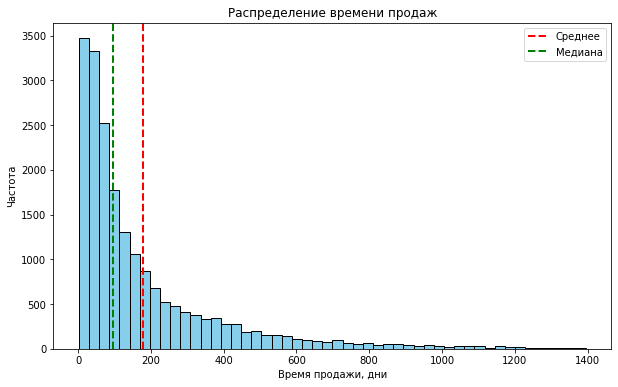

In [81]:
plt.figure(figsize=(10, 6))
plt.hist(data['days_exposition'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.title('Распределение времени продаж')
plt.xlabel('Время продажи, дни')
plt.ylabel('Частота')
plt.axvline(mean_days, color='red', linestyle='dashed', linewidth=2, label='Среднее')
plt.axvline(median_days, color='green', linestyle='dashed', linewidth=2, label='Медиана')
plt.legend()
plt.show()

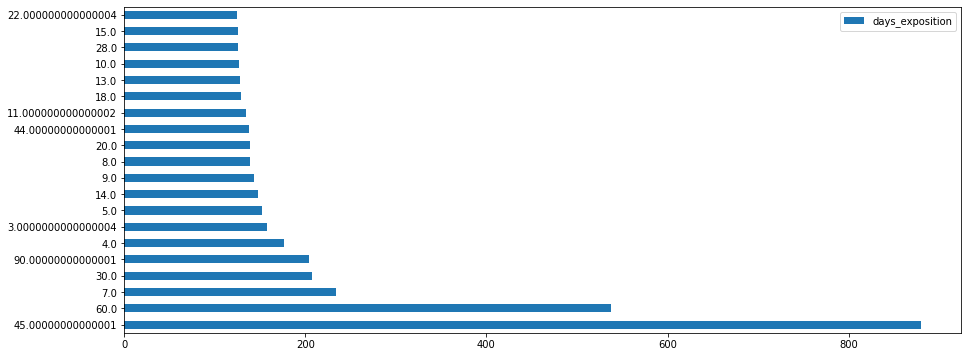

In [82]:
# check
# Моды на сырых данных
    
df_check['days_exposition'].value_counts().to_frame().head(20).plot(kind = 'barh', figsize = (15,6), rot = 0);

In [83]:
q25 = data['days_exposition'].quantile(0.25)
q75 = data['days_exposition'].quantile(0.75)

fast_sales = data[data['days_exposition'] <= q25]
slow_sales = data[data['days_exposition'] >= q75]

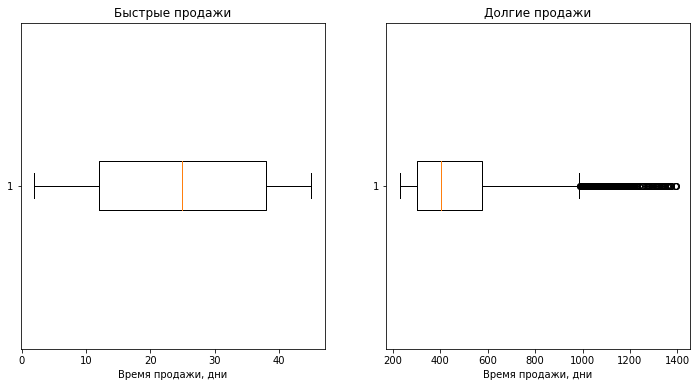

In [84]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.boxplot(fast_sales['days_exposition'], vert=False)
plt.title('Быстрые продажи')
plt.xlabel('Время продажи, дни')

plt.subplot(1, 2, 2)
plt.boxplot(slow_sales['days_exposition'], vert=False)
plt.title('Долгие продажи')
plt.xlabel('Время продажи, дни')

plt.show()

Вывод:

Среднее время продажи составляет 178.16 дней, а медианное - 95.0 дней. Это указывает на наличие существенного разброса данных и наличие долгих продаж, влияющих на среднюю.

Распределение времени продажи имеет положительную асимметрию (правостороннее), что подтверждается значительно большим средним значением по сравнению с медианным.

Интересно отметить, что скорость продажи уменьшается с течением времени. В 2014 году среднее время продажи было 862.70 дней, в то время как в 2019 году сократилось до 30.90 дней. Это может быть связано с изменениями в рынке недвижимости, экономическими факторами или изменением спроса.

Модальные значения (пиковые) в days_exposition наблюдаются на 45 и 60 днях. Существующие значения на 44 и 45 днях могут иметь техническую природу и быть результатом снятия объявлений. Такие значения, возможно, искажают общий анализ скорости продажи недвижимости.

Исходя из квартилей, 25-й квартиль (q25) равен 45 дням, а 75-й квартиль (q75) равен 228 дням. Таким образом, продажи, которые завершились за 45 дней или менее, считаются быстрыми, в то время как продажи, длительностью более 228 дней, можно считать необычно долгими.

#### Анализ факторов влияющих на общую стоимость объекта недвижимости

**1. Зависимость цены от общей площади объекта**

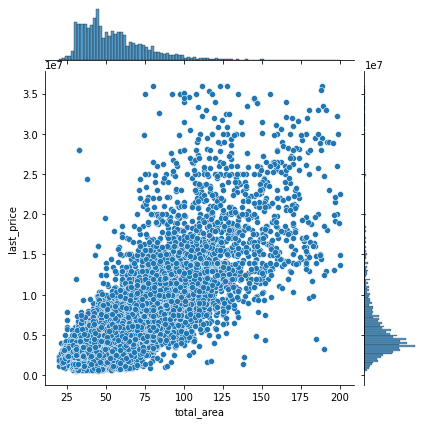

In [85]:
sns.jointplot(x='total_area', y='last_price', data=data, kind='scatter')
plt.show()

In [86]:
correlation = data['total_area'].corr(data['last_price'])
print(f"Коэффициент корреляции: {correlation:.2f}")

Коэффициент корреляции: 0.78


Вывод: График и коэффициент корреляции (0.78) показывают, что между общей площадью объекта и его стоимостью существует сильная положительная зависимость. Увеличение площади сопровождается ростом стоимости объекта, что делает этот параметр важным при определении общей стоимости недвижимости.

**2. Зависимость цены от жилой площади объекта**

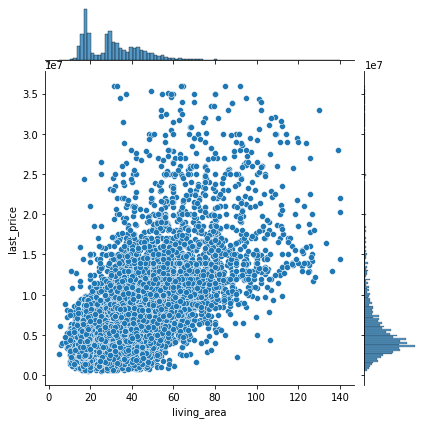

In [87]:
sns.jointplot(x='living_area', y='last_price', data=data, kind='scatter')
plt.show()

In [88]:
correlation = data['living_area'].corr(data['last_price'])
print(f"Коэффициент корреляции: {correlation:.2f}")

Коэффициент корреляции: 0.66


Вывод: График зависимости цены от жилой площади объекта недвижимости показывает положительную корреляцию с коэффициентом 0.66. Это свидетельствует о том, что жилая площадь имеет влияние на стоимость объекта: чем больше площадь, тем выше вероятность более высокой цены.

**3. Зависимость цены от площади кухни**

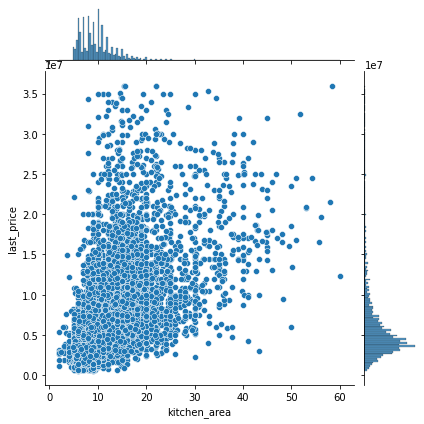

In [89]:
sns.jointplot(x='kitchen_area', y='last_price', data=data, kind='scatter')
plt.show()

In [90]:
correlation = data['kitchen_area'].corr(data['last_price'])
print(f"Коэффициент корреляции: {correlation:.2f}")

Коэффициент корреляции: 0.59


Вывод: Увеличение площади кухни положительно коррелирует с ростом общей стоимости недвижимости (коэффициент корреляции 0.59), что подтверждается графиком. Таким образом, размер кухни существенно влияет на цену объекта.

**4. Зависимость цены от количества комнат**

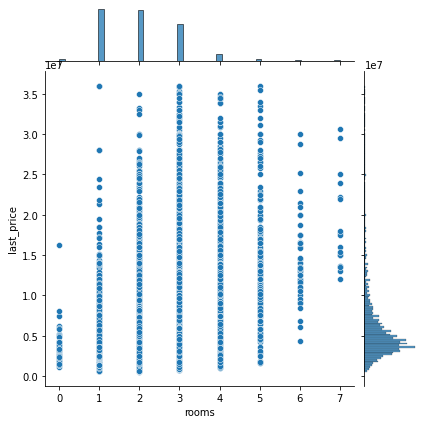

In [91]:
sns.jointplot(x='rooms', y='last_price', data=data, kind='scatter')
plt.show()

In [92]:
correlation = data['rooms'].corr(data['last_price'])
print(f"Коэффициент корреляции: {correlation:.2f}")

Коэффициент корреляции: 0.48


Вывод: Анализ показал, что между количеством комнат и полной стоимостью объекта недвижимости существует положительная корреляция (коэффициент 0.48). Увеличение количества комнат сопровождается повышением цены, что видно на графике.

**5. Зависимость цены от типа этажа, на котором расположена квартира (первый, последний, другой)**

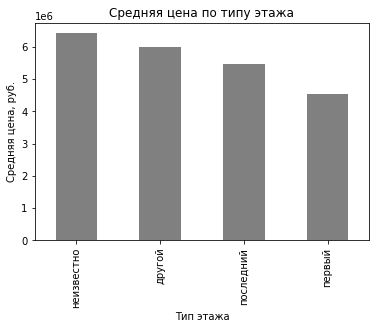

In [93]:
avg_price_by_floor_type = data.groupby('floor_type')['last_price'].mean().sort_values(ascending=False)
avg_price_by_floor_type.plot(kind='bar', color='grey')
plt.title('Средняя цена по типу этажа')
plt.xlabel('Тип этажа')
plt.ylabel('Средняя цена, руб.')
plt.show()

In [94]:
avg_price_by_floor_type.describe()

count    4.000000e+00
mean     5.604599e+06
std      8.057595e+05
min      4.547799e+06
25%      5.234553e+06
50%      5.725416e+06
75%      6.095463e+06
max      6.419765e+06
Name: last_price, dtype: float64

In [95]:
floor_type_stats = data.groupby('floor_type')['last_price'].agg(['mean', 'median', 'count'])
print(floor_type_stats)

                    mean     median  count
floor_type                                
другой      5.987362e+06  4800000.0  17008
неизвестно  6.419765e+06  5150000.0     85
первый      4.547799e+06  3900000.0   2858
последний   5.463471e+06  4250000.0   3201


Вывод: Анализ зависимости цены от типа этажа показывает, квартиры на первом этаже имеют самую низкую среднюю цену, составляющую примерно 4.55 млн рублей, в то время как квартиры на последнем этаже оцениваются в среднем в 5.46 млн рублей. Квартиры, расположенные на других этажах (не первом и не последнем), имеют среднюю цену в районе 5.99 млн рублей. Таким образом, наличие квартиры на первом или последнем этаже может влиять на её стоимость, причем последний этаж имеет более высокую цену по сравнению с первым.
Из анализа также видно, что квартиры с неизвестным типом этажа имеют среднюю цену в размере 6.42 млн рублей, что является наивысшим показателем среди всех типов этажей. Однако, стоит отметить, что количество таких квартир в выборке составляет всего 85, что делает этот сегмент менее представительным. Таким образом, данные по квартирам с неизвестным типом этажа могут быть менее надежными из-за их ограниченного количества в выборке.

**6. Зависимость цены от даты размещения (день недели, месяц, год)**

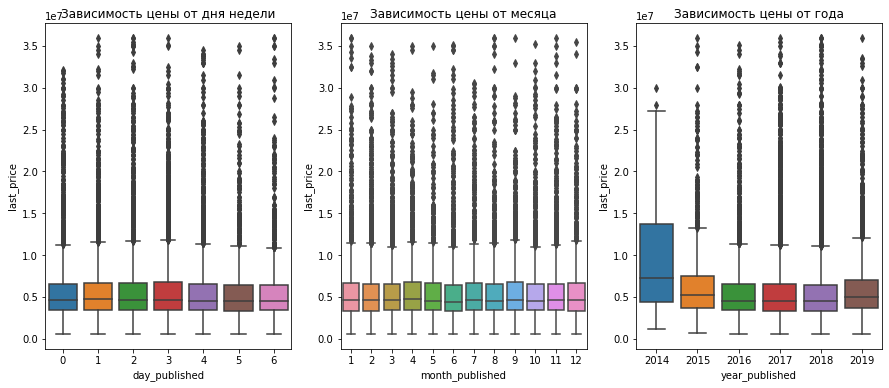

In [96]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x=data['day_published'], y=data['last_price'])
plt.title('Зависимость цены от дня недели')

plt.subplot(1, 3, 2)
sns.boxplot(x=data['month_published'], y=data['last_price'])
plt.title('Зависимость цены от месяца')

plt.subplot(1, 3, 3)
sns.boxplot(x=data['year_published'], y=data['last_price'])
plt.title('Зависимость цены от года')
plt.show()

In [97]:
average_price_weekday = data.groupby('day_published')['last_price'].mean()
average_price_month = data.groupby('month_published')['last_price'].mean()
average_price_year = data.groupby('year_published')['last_price'].mean()

print("Средняя цена в зависимости от дня недели:\n", average_price_weekday)
print("\nСредняя цена в зависимости от месяца:\n", average_price_month)
print("\nСредняя цена в зависимости от года:\n", average_price_year)

Средняя цена в зависимости от дня недели:
 day_published
0    5.781138e+06
1    5.726704e+06
2    5.854698e+06
3    5.833810e+06
4    5.670805e+06
5    5.495305e+06
6    5.607452e+06
Name: last_price, dtype: float64

Средняя цена в зависимости от месяца:
 month_published
1     5.853713e+06
2     5.743609e+06
3     5.673976e+06
4     5.768877e+06
5     5.677426e+06
6     5.557857e+06
7     5.749111e+06
8     5.766658e+06
9     5.833075e+06
10    5.682214e+06
11    5.793318e+06
12    5.768224e+06
Name: last_price, dtype: float64

Средняя цена в зависимости от года:
 year_published
2014    9.650602e+06
2015    6.619571e+06
2016    5.703381e+06
2017    5.628972e+06
2018    5.568082e+06
2019    6.070816e+06
Name: last_price, dtype: float64


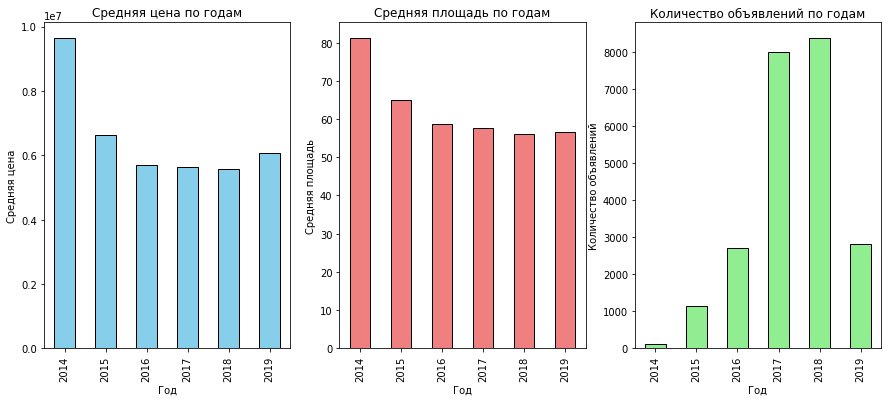

In [98]:
average_price_year = data.groupby('year_published')['last_price'].mean()
average_area_year = data.groupby('year_published')['total_area'].mean()
count_ads_year = data.groupby('year_published')['last_price'].count()

plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
average_price_year.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Средняя цена по годам')
plt.xlabel('Год')
plt.ylabel('Средняя цена')

plt.subplot(1, 3, 2)
average_area_year.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Средняя площадь по годам')
plt.xlabel('Год')
plt.ylabel('Средняя площадь')

plt.subplot(1, 3, 3)
count_ads_year.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Количество объявлений по годам')
plt.xlabel('Год')
plt.ylabel('Количество объявлений')

plt.show()

In [99]:
print("\nИзменение средней цены, площади и количество объявлений по годам:")
print("Год | Средняя цена | Средняя площадь | Количество объявлений")
for year in average_price_year.index:
    print(f"{year}  | {average_price_year[year]:.2f}        | {average_area_year[year]:.2f}            | {count_ads_year[year]}")


Изменение средней цены, площади и количество объявлений по годам:
Год | Средняя цена | Средняя площадь | Количество объявлений
2014  | 9650601.82        | 81.25            | 121
2015  | 6619571.14        | 64.91            | 1131
2016  | 5703381.17        | 58.76            | 2709
2017  | 5628971.82        | 57.58            | 8002
2018  | 5568081.53        | 56.13            | 8373
2019  | 6070816.24        | 56.74            | 2816


Вывод:

Из анализа зависимости цены от даты размещения объявления видно следующее:

1. **Зависимость от дня недели:** Средняя цена квартир не сильно меняется в зависимости от дня недели размещения объявления. Однако, есть небольшой тренд, где цены в выходные дни (5 - суббота и 6 - воскресенье) немного ниже.

2. **Зависимость от месяца:** Средняя цена квартир также несильно варьируется в зависимости от месяца размещения объявления. Самые высокие цены обычно приходятся на январь, сентябрь и ноябрь.

3. **Зависимость от года:** Наибольшая средняя цена была зарегистрирована в 2014 году, а затем она постепенно снижалась до 2018 года, после чего начала расти снова в 2019 году. Средняя площадь квартир снижалась с 2014 по 2018 год, но в 2019 году этот показатель немного увеличился. Количество объявлений показывает устойчивый рост с 2014 по 2018 год, а затем снижение в 2019 году.

#### Средняя стоимость квадратного метра в 10 популярных населённых пунктах и рекордные цены в лидерах и аутсайдерах

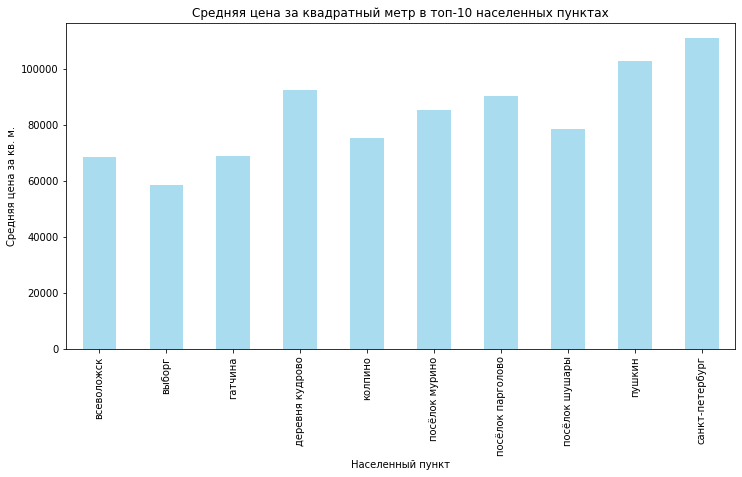

In [100]:
top_localities_count = data.groupby('locality_name')['price_per_sq'].count().sort_values().tail(10)
avg_price_per_sq = data[data['locality_name'].isin(top_localities_count.index)].groupby('locality_name')['price_per_sq'].mean()

top_localities = pd.concat([avg_price_per_sq, top_localities_count], axis=1)
top_localities.columns = ['Средняя цена за кв. м.', 'Количество объявлений']

plt.figure(figsize=(12, 6))
top_localities['Средняя цена за кв. м.'].plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Средняя цена за квадратный метр в топ-10 населенных пунктах')
plt.xlabel('Населенный пункт')
plt.ylabel('Средняя цена за кв. м.')
plt.show()

In [101]:
top_localities

,Средняя цена за кв. м.,Количество объявлений
locality_name,,
всеволожск,68465.823554,383
выборг,58478.378300,227
гатчина,68694.019852,300
деревня кудрово,92251.993641,295
колпино,75380.806970,333
посёлок мурино,85411.748494,541
посёлок парголово,90069.061187,317
посёлок шушары,78630.472416,435
пушкин,102569.374468,353


In [102]:
print("\nТоп-10 населенных пунктов с самой высокой стоимостью квадратного метра:")
print(top_localities.sort_values(by='Средняя цена за кв. м.', ascending=False))


Топ-10 населенных пунктов с самой высокой стоимостью квадратного метра:
                   Средняя цена за кв. м.  Количество объявлений
locality_name                                                   
санкт-петербург             110874.099403                  14971
пушкин                      102569.374468                    353
деревня кудрово              92251.993641                    295
посёлок парголово            90069.061187                    317
посёлок мурино               85411.748494                    541
посёлок шушары               78630.472416                    435
колпино                      75380.806970                    333
гатчина                      68694.019852                    300
всеволожск                   68465.823554                    383
выборг                       58478.378300                    227


In [103]:
highest_price = top_localities['Средняя цена за кв. м.'].idxmax()
highest_price_per_sq = top_localities['Средняя цена за кв. м.'].max()
lowest_price = top_localities['Средняя цена за кв. м.'].idxmin()
lowest_price_per_sq = top_localities['Средняя цена за кв. м.'].min()

print(f"\nНаселённый пункт с самой высокой стоимостью квадратного метра: {highest_price}")
print(f"Средняя цена за кв. м.: {highest_price_per_sq:.2f} руб.")
print(f"Количество объявлений: {top_localities.loc[highest_price, 'Количество объявлений']}")

print(f"\nНаселённый пункт с самой низкой стоимостью квадратного метра: {lowest_price}")
print(f"Средняя цена за кв. м.: {lowest_price_per_sq:.2f} руб.")
print(f"Количество объявлений: {top_localities.loc[lowest_price, 'Количество объявлений']}")


Населённый пункт с самой высокой стоимостью квадратного метра: санкт-петербург
Средняя цена за кв. м.: 110874.10 руб.
Количество объявлений: 14971

Населённый пункт с самой низкой стоимостью квадратного метра: выборг
Средняя цена за кв. м.: 58478.38 руб.
Количество объявлений: 227


Вывод:
Самая высокая стоимость квадратного метра: Санкт-Петербург занимает лидирующую позицию с самой высокой средней стоимостью квадратного метра в размере 110,874.10 рублей. Этот город также является лидером по количеству объявлений, что может быть связано с высоким спросом на недвижимость в столичном регионе.

Самая низкая стоимость квадратного метра: Выборг занимает последнюю позицию в топ-10 с самой низкой средней стоимостью квадратного метра в размере 58,478.38 рублей. Несмотря на более низкую стоимость, количество объявлений в Выборге также сравнительно невелико.

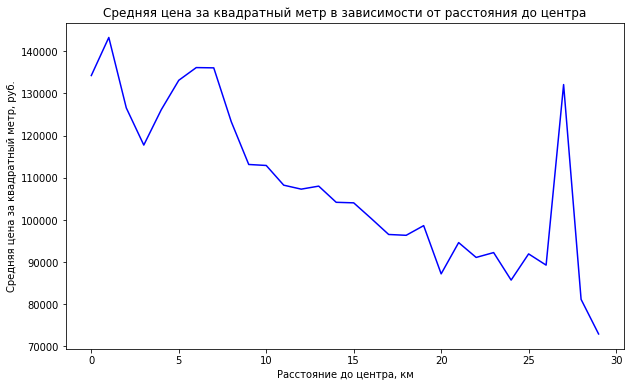

In [104]:
spb_data = data[data['locality_name'] == 'санкт-петербург']
average_price_per_km = spb_data.groupby('dist_from_center_km')['price_per_sq'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=average_price_per_km.index, y=average_price_per_km.values, color='blue')
plt.title('Средняя цена за квадратный метр в зависимости от расстояния до центра')
plt.xlabel('Расстояние до центра, км')
plt.ylabel('Средняя цена за квадратный метр, руб.')
plt.show()

In [105]:
correlation = spb_data['dist_from_center_km'].corr(spb_data['last_price'])
print(f"Коэффициент корреляции: {correlation:.2f}")

Коэффициент корреляции: -0.41


In [106]:
# Изучение выброса на 27-м км
outlier_data = spb_data[spb_data['dist_from_center_km'] == 27]
cols = ['last_price', 'total_area', 'price_per_sq', 'dist_from_center_km', 'year_exposition']
outlier_data[cols]

,last_price,total_area,price_per_sq,dist_from_center_km,year_exposition
748,14350000.0,74.0,193918.918919,27.0,2017
5961,2250000.0,32.0,70312.500000,27.0,2018


In [107]:
# Анализ категорий квартир на 3-м и 5-м км
category_distribution_3km = spb_data[spb_data['dist_from_center_km'] == 3]['floor_type'].value_counts()
category_distribution_5km = spb_data[spb_data['dist_from_center_km'] == 5]['floor_type'].value_counts()
print("\nРаспределение категорий квартир на 3-м км:")
print(category_distribution_3km)

print("\nРаспределение категорий квартир на 5-м км:")
print(category_distribution_5km)


Распределение категорий квартир на 3-м км:
другой        200
последний      77
первый         54
неизвестно      2
Name: floor_type, dtype: int64

Распределение категорий квартир на 5-м км:
другой        633
последний     126
первый         77
неизвестно      4
Name: floor_type, dtype: int64


Вывод:Из проведенного анализа видно, что стоимость квадратного метра недвижимости в Санкт-Петербурге зависит от расстояния до центра города. Визуализация показала, что средняя цена за квадратный метр уменьшается по мере удаления от центра. Коэффициент корреляции между расстоянием до центра и ценой квадратного метра составляет -0.41, что указывает на умеренную обратную зависимость.

Интересно отметить, что на 27-м километре есть выброс в виде двух квартир с аномально низкой стоимостью за квадратный метр. Подобные выбросы могут повлиять на общую картину и требуют дополнительного исследования. 

Для более глубокого понимания различий в ценах в центре и на периферии, было проанализировано распределение категорий квартир на 3-м и 5-м километрах от центра. На 3-м километре преобладают квартиры типа "другой", а на 5-м километре также заметно увеличивается количество квартир этого типа. Это может свидетельствовать о том, что в центре преимущественно представлены многоэтажные дома, где квартиры могут занимать как центральные, так и промежуточные этажи.

В целом, анализ позволяет сделать вывод о том, что близость к центру города влияет на стоимость жилья, и такие факторы, как этаж и тип здания, могут оказывать значительное влияние на формирование цен на недвижимость в разных километровых зонах Санкт-Петербурга.

### Общий вывод

**Общая характеристика данных**: Датасет содержит 23699 записей и 22 столбца. В процессе ознакомления с данными были выявлены пропущенные значения в нескольких столбцах, различные типы данных, а также аномалии и выбросы.

**Предобработка данных**: Произведена предобработка данных, включающая заполнение пропущенных значений, изменение типов данных, устранение неявных дубликатов и аномальных значений. Например, для корректного заполнения пропусков в столбцах ceiling_height, kitchen_area и living_area использован подход с заменой медианными значениями для каждого населенного пункта. Также проведена фильтрация данных для исключения аномалий в различных параметрах, обеспечивая более чистый и надежный датасет. Окончательный размер датасета после предобработки составил 23160 записей с потерей примерно 2.3%, что находится в пределах оптимального уровня.

**Добавление новых параметров**: В результате анализа были добавлены новые столбцы в таблицу, включая цену за квадратный метр, день, месяц и год публикации объявления, тип этажа квартиры и расстояние до центра города в километрах.

**Исследовательский анализ:**

1. Общая характеристика объектов по каждому параметру:

Общая площадь недвижимости: Большинство объектов имеют относительно небольшую площадь, с пиком в районе 40-50 квадратных метров.Распределение обладает положительной асимметрией, с выбросами объектов с очень большой площадью.

Жилая площадь: Большинство квартир имеют жилую площадь от 16 до 45 квадратных метров, с медианным значением в 30 квадратных метров.
Есть некоторые квартиры с высокой жилой площадью, но они представляют собой выбросы.

Площадь кухни: Большинство кухонных площадей сосредоточены в диапазоне от 7 до 12 квадратных метров.
Наблюдаются случаи с кухнями более 20 квадратных метров, но они являются выбросами.

Цены на недвижимость: Распределение цен на недвижимость является правосторонним с длинным хвостом в области высоких цен.Большинство объектов сосредоточены в диапазоне от 500 тысяч до 10 миллионов, с медианной ценой в 4,6 миллиона.

Количество комнат: Большинство объектов имеют от одной до трех комнат, но есть случаи с нулевым значением, что может быть связано с некорректными данными или студиями.

Высота потолков: Большинство объектов имеют высоту потолков в диапазоне от 2.3 до 4 метров.
Наблюдается небольшой процент объектов с высокой высотой потолков, что может указывать на особенности типов помещений.

Этажи: Большинство объектов расположены на нижних этажах, с пиком в районе первого этажа.
Преобладают квартиры на промежуточных этажах, затем на последнем этаже, и менее часто на первом.

Общее количество этажей: Большинство объектов имеют от 5 до 16 этажей, с наиболее частым значением в диапазоне от 5 до 9 этажей.

Расстояние до центра города: Большинство объектов находятся в относительной близости к центру, с пиком частоты в интервале от 10 до 15 км.

Расстояние до парков и водоемов:Большинство объектов находятся в пределах 200-600 метров от ближайшего парка.

Дни недели и месяцы размещения объявлений: Пик размещения объявлений приходится на четверг, а наибольшая активность - весной и осенью.

2. Анализ скорости продаж:

Среднее время продажи составляет 178.16 дней, а медианное - 95.0 дней.
Распределение времени продажи положительно асимметрично, с выраженным разбросом данных.
Существует тенденция к уменьшению скорости продаж с течением времени, возможно, связанная с изменениями на рынке.

3. Факторы, влияющие на стоимость:

Площадь недвижимости: Сильная положительная зависимость между общей площадью и стоимостью.

Жилая площадь и площадь кухни: Также положительная корреляция с ценой, что подтверждает влияние размеров помещений на стоимость.

Количество комнат: Положительная зависимость между количеством комнат и ценой.

Тип этажа: Квартиры на последнем этаже могут иметь более высокую стоимость, чем на первом. Неизвестный тип этажа имеет наивысшую цену, но выборка ограничена.

4. Влияние времени размещения объявления:

Средняя цена не сильно меняется в зависимости от дня недели или месяца размещения, но есть небольшие колебания.
В 2014 году было высокое среднее время продажи, но оно существенно снижалось в последующие годы.

5. Анализ цен на недвижимость в Санкт-Петербурге:

Расстояние до центра: Существует обратная зависимость между расстоянием до центра и ценой за квадратный метр.

Разбивка по километрам: Стоимость квадратного метра снижается с удалением от центра.

Типы квартир: В центре преобладают многоэтажные дома, в периферийных зонах - квартиры "другого" типа.

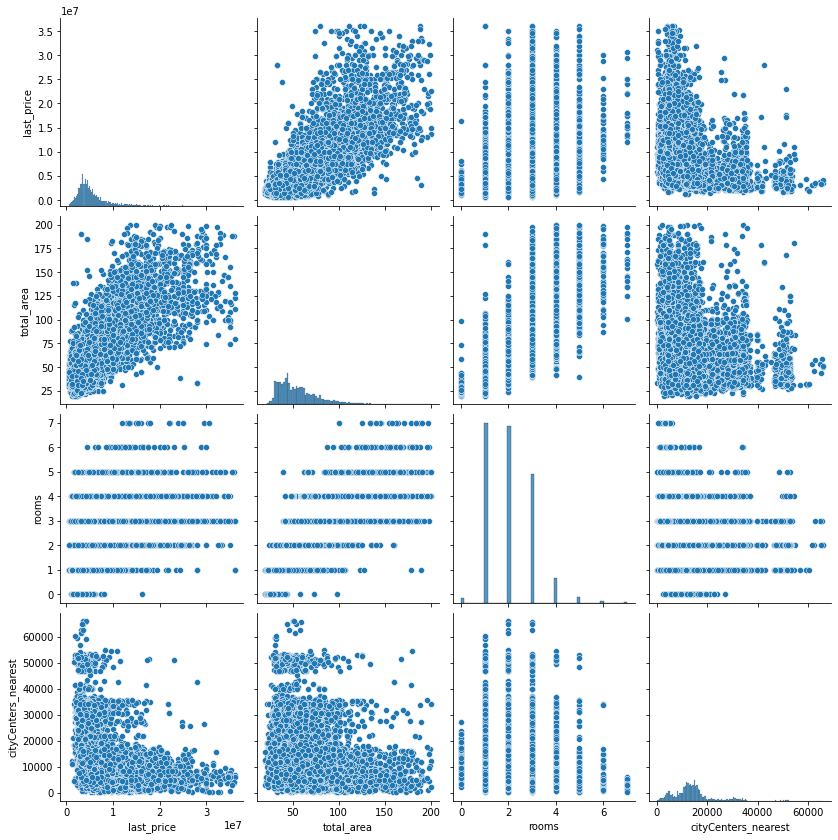

In [109]:
# check
sns.pairplot(data[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']])
plt.gcf().set_size_inches(12,12);


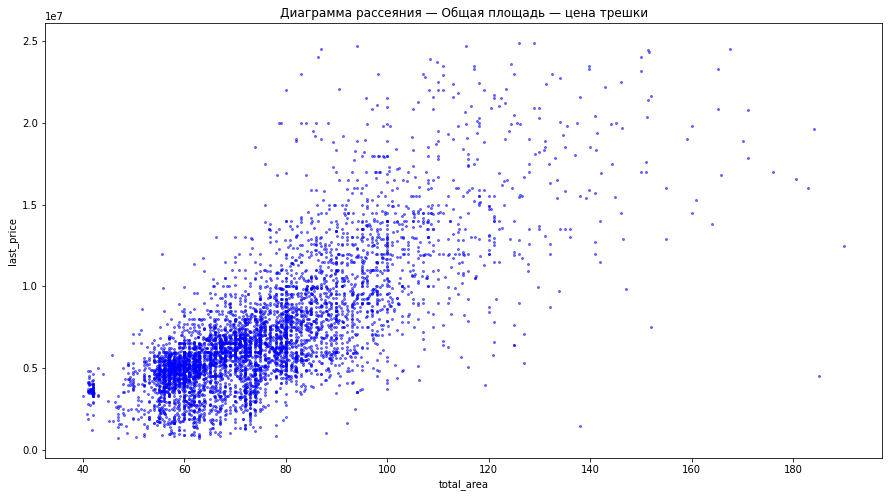

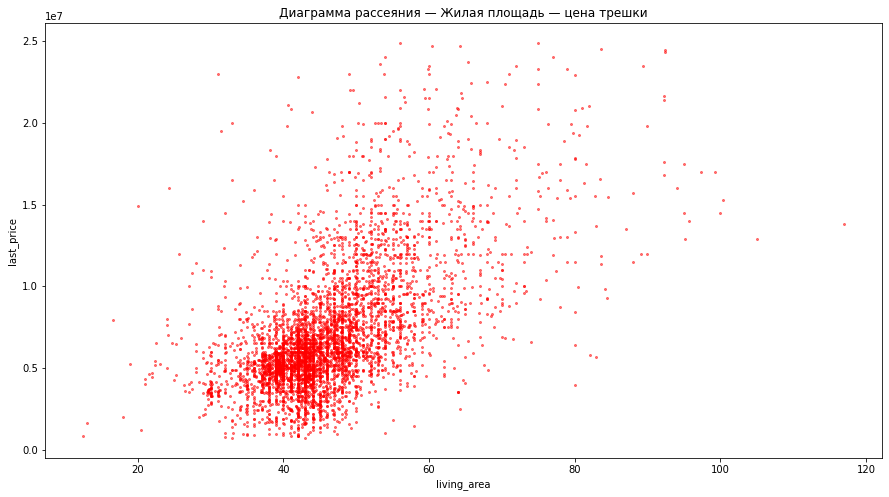

In [110]:
# check
data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter',
        y='last_price' , x='total_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.title('Диаграмма рассеяния — Общая площадь — цена трешки')


data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter', 
        y='last_price' , x='living_area', alpha=0.5, figsize=(15,8), c = 'r', s = 4)
plt.title('Диаграмма рассеяния — Жилая площадь — цена трешки');

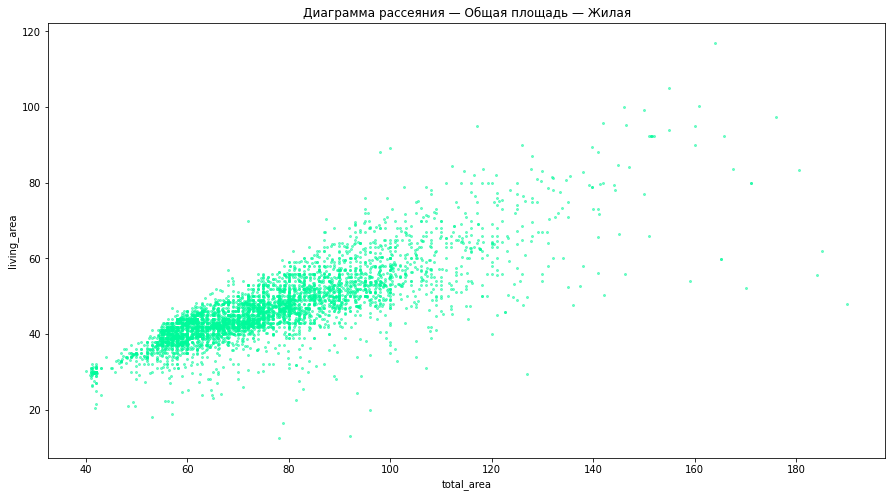

In [111]:
# check
data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter',
        y='living_area' , x='total_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'MediumSpringGreen', s = 4)
plt.title('Диаграмма рассеяния — Общая площадь — Жилая');